In [4]:
# Import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import psycopg2

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from database_connection import ENGINE

# Test Linear Regression Model

In [5]:
# Read top cities table
top_us_cities_query = '''
    SELECT *
    FROM top_us_cities
'''    
cities = pd.read_sql_query(
    top_us_cities_query,
    con=ENGINE
)                          

In [7]:
cities.sample(20)

,city,states,population,lat,lon
421,New Rochelle,New York,79446,40.911488,-73.782355
561,Boulder,Colorado,103166,40.014986,-105.270546
824,Hurst,Texas,38448,32.823462,-97.170568
180,San Buenaventura (Ventura),California,108817,34.274646,-119.229032
71,Fountain Valley,California,56707,33.709185,-117.953670
649,Beaumont,Texas,117796,30.080174,-94.126556
538,Lake Oswego,Oregon,37610,45.420675,-122.670650
293,San Leandro,California,87965,37.724930,-122.156077
845,Hallandale Beach,Florida,38632,25.981202,-80.148379
787,Attleboro,Massachusetts,43886,41.944544,-71.285608


In [ ]:
X, y = make_regression(n_samples=100, n_features=1, random_state=24, noise=20, bias=50.0)

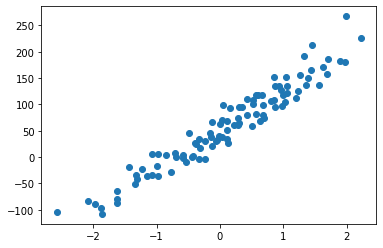

In [ ]:
plt.scatter(X, y)

In [ ]:
model = LinearRegression()
model

LinearRegression()

In [ ]:
model.fit(X, y)
print(model)

LinearRegression()


In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [73.68622249]
y-axis intercept:  52.3505031996571


In [ ]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 51.573180999075355
Predicted output: 61.05269396989404
Prediction Error: 9.479512970818682


In [ ]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,61.052694,51.573181,9.479513
1,116.539022,135.744467,-19.205445
2,-45.354712,-34.665692,-10.689020
3,-19.366764,6.805878,-26.172642
4,120.974797,134.426874,-13.452077
...,...,...,...
95,111.587291,106.903818,4.683473
96,96.719525,118.261070,-21.541545
97,191.563874,181.988316,9.575558
98,21.512531,3.015834,18.496697


# Data Selection

In [ ]:
file_path_brewery = Path("../Resources/brewery.csv")
file_path_income = Path("../Resources/income_data.csv")

In [ ]:
# Read CSV
brewery_df = pd.read_csv(file_path_brewery)

brewery_df.head()

In [ ]:
# Read clothing CSV
income_df = pd.read_csv(file_path_income)

income_df.head()

In [ ]:
# Remove not useful columns from dataframe

In [ ]:
# Group dataframe based on number of breweries and location

In [ ]:
# Merge dataframe with demographic infro dataframe grouped by location
brewery_demo_df = brewery_df.merge(clothing_df, )

# Data Processing

In [ ]:
# Transform String Columns(Onehotencoder)

In [ ]:
# Scale data if needed (StandardScaler)
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [ ]:
brewery_scaled = data_scaler.fit(encoded_df)

brewery_scaled[:5]

# Data Transformation

In [ ]:
# Save Cleaned Data to csv

In [ ]:
# Export cleaned data csv to sql table

In [ ]:
# Set X and y 
# X = demographic info + number of Breweries per location(zipcode tabulation area?)
# y = number of stores

In [ ]:
# traintestsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [ ]:
# Create an instance of the model(LinearRegression)
model = LinearRegression()

In [ ]:
# Train the model with the dataset 
model.fit(X_train,y_train)

In [ ]:
# Create predictions
predictions = model.predict(X_test)

print(predictions.shape)

In [ ]:
# Validate the model
# accuracy_score
acc_score = accuracy_score(y_test, predictions)

# confusion_matrix/classification_report
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [ ]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
# Find impact of different variables